In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
file_name = 'heart.csv'
heart_disease = pd.read_csv(file_name)
#print(heart_disease)

In [ ]:
heart_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,NaN,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,NaN,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0


In [ ]:
categorical_columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for col in categorical_columns:
    print(f"Column: {col}")
    print(heart_disease[col].unique())


Column: Sex
['M' 'F']
Column: ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
Column: RestingECG
['Normal' 'ST' 'LVH']
Column: ExerciseAngina
['N' 'Y']
Column: ST_Slope
['Up' 'Flat' 'Down']


In [ ]:
heart_disease.shape

(918, 12)

In [ ]:
heart_disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,905.000000,853.000000,918.000000,897.000000,918.000000,918.000000
mean,53.510893,132.699448,194.093787,0.233115,136.693423,0.887364,0.553377
std,9.432617,18.386589,109.972054,0.423046,25.549512,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,168.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,221.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,264.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
heart_disease['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
heart_disease.isnull().sum()

Age                0
Sex                0
ChestPainType      0
RestingBP         13
Cholesterol       65
FastingBS          0
RestingECG         0
MaxHR             21
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
le = LabelEncoder()

for col in categorical_columns:
    heart_disease[col] = le.fit_transform(heart_disease[col])


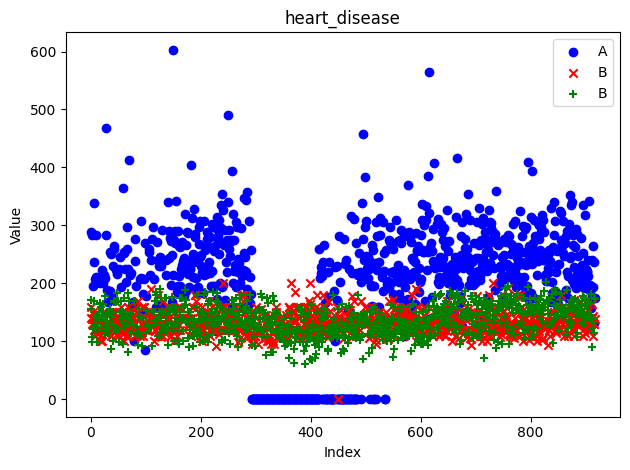

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(heart_disease.index, heart_disease['Cholesterol'], label='A', marker='o', color='blue')
plt.scatter(heart_disease.index, heart_disease['RestingBP'], label='B', marker='x', color='red')
plt.scatter(heart_disease.index, heart_disease['MaxHR'], label='B', marker='+', color='green')
plt.title('heart_disease')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
heart_disease['RestingBP'].fillna(heart_disease['RestingBP'].mean(),inplace=True)
heart_disease['MaxHR'].fillna(heart_disease['MaxHR'].mean(),inplace=True)

In [ ]:
heart_disease.groupby('HeartDisease')['Cholesterol'].mean()

HeartDisease
0    226.590452
1    165.668132
Name: Cholesterol, dtype: float64

In [ ]:
mean_cholesterol = heart_disease.groupby('HeartDisease')['Cholesterol'].mean()
heart_disease['Cholesterol'] = heart_disease.apply(
    lambda row: mean_cholesterol[row['HeartDisease']] if pd.isnull(row['Cholesterol']) else row['Cholesterol'],
    axis=1
)


In [ ]:
heart_disease.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
X = heart_disease.drop(columns='HeartDisease',axis=1)
Y = heart_disease['HeartDisease']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.842391304347826
Precision: 0.90625
Recall: 0.8130841121495327


/home/sr/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


svm


In [ ]:
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.8532608695652174
Precision: 0.9
Recall: 0.8411214953271028


- Imported the required libraries and loaded the 'heart.csv' dataset using pandas.
- Explored the dataset's shape, summary statistics, class distribution, and checked for missing values.
- Encoded categorical columns using LabelEncoder for machine learning compatibility.
- Created a scatter plot to visualize the distribution of 'Cholesterol,' 'RestingBP,' and 'MaxHR' variables.
- Handled missing values by filling 'RestingBP' and 'MaxHR' with their respective means and imputing 'Cholesterol' based on the mean grouped by 'HeartDisease' class.
- Split the dataset into features (X) and the target variable (Y), then further split it into training and testing sets (80/20 ratio).
- Applied two classification models: Logistic Regression and SVM.
- Trained both models on the training data and predicted target values on the testing data.
- Calculated evaluation metrics, including accuracy, precision, and recall, for model performance assessment.
- The code aimed to analyze and predict the presence or absence of heart disease based on the dataset's features.

Logistic Regression achieved an accuracy of 84.2%, precision of 90.6%, and recall of 81.3%, while SVM achieved an accuracy of 85.3%, precision of 90%, and recall of 84.1%.